# Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score


# Data Pre-Proces

In [2]:
file_path = 'heart_disease_uci.csv'
df = pd.read_csv(file_path)
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
# Droping unnecessary columns
df.drop(columns=['id', 'dataset'], inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(531, 12)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


since features "ca" and "thal" are missing more than 40% of their data, replacing more than 40% of data would make it too inaccuarte

In [ ]:
# Drop columns with excessive missing values
df = df.drop(columns=['ca', 'thal'])

In [ ]:
df = df.dropna()

In [ ]:
# Impute numerical columns with median
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df[col] = df[col].fillna(df[col].median())

# Impute binary and categorical columns with mode
for col in ['fbs', 'restecg', 'exang', 'slope']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if missing values remain
df.isnull().sum()

/tmp/ipython-input-2132345856.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df.shape

(531, 12)

In [ ]:
# Step 3: Encode boolean columns
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0


In [ ]:
ratios = df['num'].value_counts(normalize=True)
print(ratios)

num
0    0.389831
1    0.303202
2    0.133710
3    0.133710
4    0.039548
Name: proportion, dtype: float64


In [ ]:
df.shape

(531, 12)

In [ ]:
# Separate features and target
X = df.drop('num', axis=1)
y = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
ratios = y.value_counts()
print(ratios)

NameError: name 'y' is not defined

In [ ]:
print("X no. of features", X.shape)
print("y no. of features", y.shape)

X no. of features (531, 11)
y no. of features (531,)


In [ ]:
# Encode binary categorical column 'sex' to 0/1
X['sex'] = X['sex'].map({'Male': 1, 'Female': 0})

In [ ]:
# One-hot encode multiclass categorical columns
categorical_cols = ['cp', 'restecg', 'slope']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
X.shape

(531, 15)

# Sathvi

In [3]:
file_path = 'Sathvi.csv'
df = pd.read_csv(file_path)
df

,Age,Sex,CP,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,2
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,57,1,4,130,207,0,1,96,1,1.0,2,0
527,74,1,4,155,310,0,0,112,1,1.5,3,2
528,51,0,4,114,258,1,2,96,0,1.0,1,0
529,62,1,4,160,254,1,1,108,1,3.0,2,4


In [ ]:
ratios = df.value_counts('target')
print(ratios)

target
0    207
1    161
2     71
3     71
4     21
Name: count, dtype: int64


In [4]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [6]:
%pip install boruta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
# Initialize Random Forest (can tune n_estimators and max_depth)
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# Initialize Boruta
boruta_selector = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    alpha=0.05,        # p-value threshold
    two_step=True,     # perform a second step for better accuracy
    random_state=42
)

# Fit Boruta
boruta_selector.fit(X, y)

# Get the selected features
selected_features = df.drop('target', axis=1).columns[boruta_selector.support_].to_list()
print("Selected features by Boruta:", selected_features)

# Features that are tentative
tentative_features = df.drop('target', axis=1).columns[boruta_selector.support_weak_].to_list()
print("Tentative features:", tentative_features)

Selected features by Boruta: ['Age', 'CP', 'chol', 'thalach', 'exang', 'oldpeak', 'slope']
Tentative features: []


In [8]:
X = df[selected_features]
X

,Age,CP,chol,thalach,exang,oldpeak,slope
0,63,1,233,150,0,2.3,3
1,67,4,286,108,1,1.5,2
2,67,4,229,129,1,2.6,2
3,37,3,250,187,0,3.5,3
4,41,2,204,172,0,1.4,1
...,...,...,...,...,...,...,...
526,57,4,207,96,1,1.0,2
527,74,4,310,112,1,1.5,3
528,51,4,258,96,0,1.0,1
529,62,4,254,108,1,3.0,2


# Pearson Correlation

In [ ]:
# Calculate the Pearson correlation matrix
pearson_corr = df.corr(method='pearson')

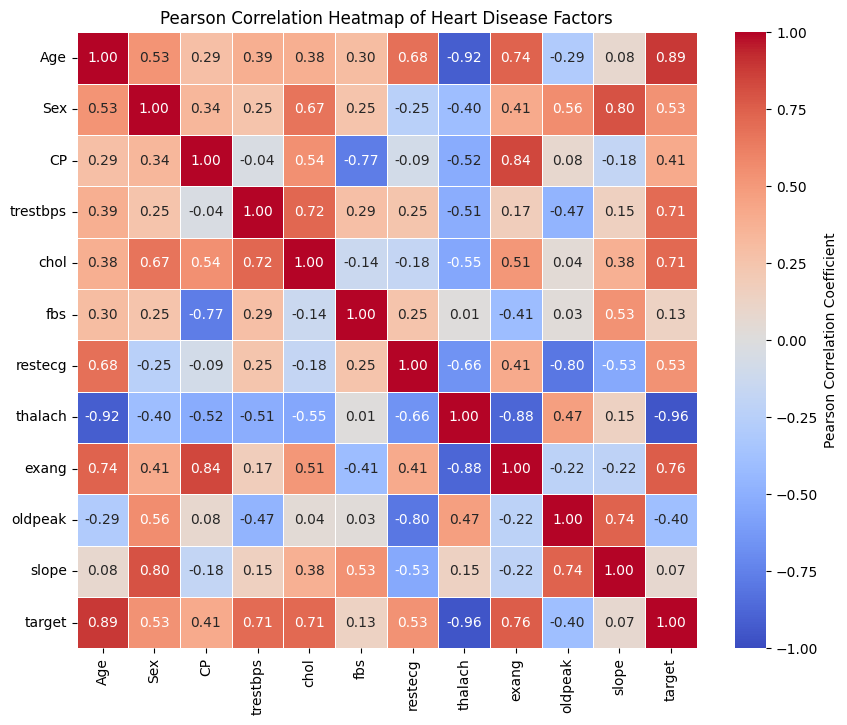

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(
    pearson_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=.5,
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)

# Set the title
plt.title('Pearson Correlation Heatmap of Heart Disease Factors')


plt.show()

In [ ]:
X = df.drop(columns=['slope', 'target'])
y = df['target'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
X

,Age,Sex,CP,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,63,1,1,145,233,1,2,150,0,2.3
1,67,1,4,160,286,0,2,108,1,1.5
2,67,1,4,120,229,0,2,129,1,2.6
3,37,1,3,130,250,0,0,187,0,3.5
4,41,0,2,130,204,0,2,172,0,1.4
...,...,...,...,...,...,...,...,...,...,...
526,57,1,4,130,207,0,1,96,1,1.0
527,74,1,4,155,310,0,0,112,1,1.5
528,51,0,4,114,258,1,2,96,0,1.0
529,62,1,4,160,254,1,1,108,1,3.0


In [ ]:
X.shape

(531, 10)

# Data Splitting and standardization

In [9]:
# Separate features and target
y = df['target'].apply(lambda x: 0 if x == 0 else 1)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Stratified K fold

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
def cross_validate_model(X, y, model, n_splits=10, random_state=42):
    """
    Perform Stratified K-Fold Cross-Validation using a given model.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target labels.
        model: A pre-initialized model (e.g., CatBoost, XGBoost, etc.).
        n_splits (int): Number of cross-validation folds.
        random_state (int): Random seed for reproducibility.

    Returns:
        avg_acc (float): Average cross-validation accuracy.
        report (str): Full classification report.
        cm (np.array): Confusion matrix.
    """
    # Stratified K-Fold setup
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    all_preds = []
    all_true = []
    scores = []

    print(f"\nStarting {n_splits}-Fold Stratified Cross-Validation using {model.__class__.__name__}...\n")

    for fold, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Clone the model for each fold to ensure a fresh start
        # Works for most sklearn-compatible models
        from sklearn.base import clone
        current_model = clone(model)

        current_model.fit(X_train, y_train)
        y_pred = current_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
        all_preds.extend(y_pred)
        all_true.extend(y_test)

        print(f"Fold {fold} Accuracy: {acc:.4f}")

    # --- Results ---
    avg_acc = np.mean(scores)
    std_acc = np.std(scores)

    print("\n" + "-" * 40)
    print(f"Average Accuracy: {avg_acc:.4f}")
    print(f"Standard Deviation: {std_acc:.4f}")

    # Classification report
    report = classification_report(all_true, all_preds, digits=4)
    print("\nClassification Report:")
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(all_true, all_preds)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix ({model.__class__.__name__} - {n_splits}-Fold CV)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return avg_acc, report, cm

# Model Building: XGBoost

In [14]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\kgoad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for xgboost


In [13]:
# Build AdaBoost Model (Base Model)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBoost model
model =  XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Metrics (Before Tuning)
XGB_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {XGB_accuracy}")

y_pred_proba = model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7757009345794392
ROC-AUC Score: 0.8358


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        50
           1       0.74      0.89      0.81        57

    accuracy                           0.78       107
   macro avg       0.79      0.77      0.77       107
weighted avg       0.79      0.78      0.77       107



In [ ]:
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.8421    0.6400    0.7273        50
           1     0.7391    0.8947    0.8095        57

    accuracy                         0.7757       107
   macro avg     0.7906    0.7674    0.7684       107
weighted avg     0.7872    0.7757    0.7711       107



/tmp/ipython-input-1470710798.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


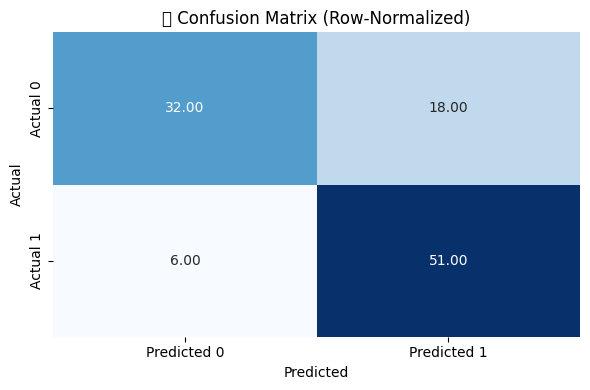

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('🔍 Confusion Matrix (Row-Normalized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# ROC-AUC
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")

🔹 ROC-AUC Score: 0.8358


# Grid Search tuning- XGBoost

Grid Search tuning- XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [1, 2, 3, 4, 5]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:25:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:25:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:25:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:25:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:25:28] WARNING: /w

Best parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
Best CV accuracy: 0.8653859104844346


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("Best parameters:", grid.best_params_)
print("Best CV auc-roc score:", grid.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
Best CV auc-roc score: 0.8653859104844346


In [ ]:
# Best Params and Retrain
print("\n✅ Best Hyperparameters:", grid.best_params_)

best_model = grid.best_estimator_


✅ Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}


# Random Search Tuning- XGBoost

Random Search Tuning- XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import classification_report

model = XGBClassifier(
    n_estimators=50,       # more trees than before, still not optimal
    max_depth=3,           # slightly deeper trees, still shallow
    learning_rate=0.2,     # lower than 1.0 → more stable
    subsample=0.7,         # sees more data per tree, still <1
    colsample_bytree=0.7,  # uses more features per tree, still room to improve
    gamma=2,               # moderate → allows more splits
    reg_alpha=1,           # moderate L1 regularization
    reg_lambda=1,          # moderate L2 regularization
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_dist = {
    'n_estimators': np.arange(50, 501, 50),       # number of trees from 50 to 500
    'max_depth': np.arange(3, 21, 2),             # tree depth from 3 to 20
    'learning_rate': np.linspace(0.01, 0.3, 10),  # step size between 0.01 and 0.3
    'subsample': np.linspace(0.5, 1.0, 6),        # fraction of samples per tree
    'colsample_bytree': np.linspace(0.5, 1.0, 6), # fraction of features per tree
    'gamma': np.linspace(0, 5, 6),                # min loss reduction required to make split
    'reg_alpha': [0, 0.1, 1, 5, 10],              # L1 regularization
    'reg_lambda': [0.1, 1, 5, 10]                 # L2 regularization
}

# RandomizedSearchCV with F1 scoring
random_search_f1 = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search_f1.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search_f1.best_params_)


Best parameters: {'subsample': np.float64(0.9), 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': np.int64(200), 'max_depth': np.int64(9), 'learning_rate': np.float64(0.1711111111111111), 'gamma': np.float64(2.0), 'colsample_bytree': np.float64(0.7)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("Best CV AUC-ROC score:", random_search_f1.best_score_)

Best CV AUC-ROC score: 0.8648443311692704


In [ ]:
# Evaluate on test set
best_model_f1 = random_search_f1.best_estimator_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Starting 15-Fold Stratified Cross-Validation using XGBClassifier...

Fold 1 Accuracy: 0.8611
Fold 2 Accuracy: 0.8333
Fold 3 Accuracy: 0.8056
Fold 4 Accuracy: 0.7222


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /w

Fold 5 Accuracy: 0.7222
Fold 6 Accuracy: 0.8889
Fold 7 Accuracy: 0.8000
Fold 8 Accuracy: 0.7143
Fold 9 Accuracy: 0.8571


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /w

Fold 10 Accuracy: 0.8286
Fold 11 Accuracy: 0.8000
Fold 12 Accuracy: 0.9143
Fold 13 Accuracy: 0.8000
Fold 14 Accuracy: 0.8571


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 15 Accuracy: 0.7429

----------------------------------------
Average Accuracy: 0.8098
Standard Deviation: 0.0602

Classification Report:
              precision    recall  f1-score   support

           0     0.7760    0.7198    0.7469       207
           1     0.8289    0.8673    0.8477       324

    accuracy                         0.8098       531
   macro avg     0.8025    0.7935    0.7973       531
weighted avg     0.8083    0.8098    0.8084       531



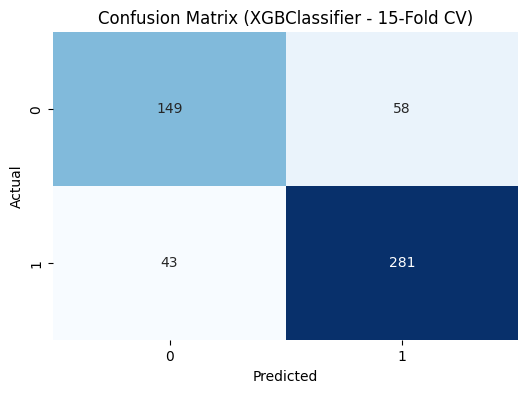

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model_f1, n_splits=15)

# Optuna Tuning-XGBoost

Optuna Tuning-XGBoost

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 21.9 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # Create model
    model = XGBClassifier(**params)

    # Cross-validation with AUC scoring
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    # Return average AUC
    return scores.mean()

# Create and run Optuna study
study = optuna.create_study(direction='maximize', study_name='xgboost_auc_opt')
study.optimize(objective, n_trials=50, timeout=600)  # 50 trials or 10 minutes

# Best results
print("Best hyperparameters:", study.best_trial.params)

[I 2025-12-02 01:26:29,757] A new study created in memory with name: xgboost_auc_opt
[I 2025-12-02 01:26:30,046] Trial 0 finished with value: 0.7877871148459384 and parameters: {'n_estimators': 372, 'learning_rate': 0.1875261337378901, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.9263792024888668, 'colsample_bytree': 0.758617486659926, 'gamma': 0.8587038643580258, 'reg_alpha': 0.3006275840350261, 'reg_lambda': 0.885660268892647}. Best is trial 0 with value: 0.7877871148459384.
[I 2025-12-02 01:26:30,299] Trial 1 finished with value: 0.7736974789915966 and parameters: {'n_estimators': 203, 'learning_rate': 0.07641672197324163, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.6052096105394843, 'colsample_bytree': 0.8697955941786828, 'gamma': 0.0840503483923466, 'reg_alpha': 0.3638318509668743, 'reg_lambda': 0.5102851019933641}. Best is trial 0 with value: 0.7877871148459384.
[I 2025-12-02 01:26:30,433] Trial 2 finished with value: 0.7831092436974789 and parameters: {'n_esti

Best hyperparameters: {'n_estimators': 345, 'learning_rate': 0.020718172583365408, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.6553327752539911, 'colsample_bytree': 0.6101310754848147, 'gamma': 4.536893101839521, 'reg_alpha': 0.07959126915011956, 'reg_lambda': 0.9664251073028628}


In [ ]:
print("Best ROC AUC score:", study.best_trial.value)

Best ROC AUC score: 0.8114005602240896


In [ ]:
# Train final model with best parameters
best_model = XGBClassifier(**study.best_params,
                           use_label_encoder=False,
                           eval_metric='logloss')

In [ ]:
best_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6101310754848147, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=4.536893101839521, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.020718172583365408,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=345, n_jobs=None,
              num_parallel_tree=None, ...)


Starting 15-Fold Stratified Cross-Validation using XGBClassifier...

Fold 1 Accuracy: 0.8611


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2 Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 Accuracy: 0.8333
Fold 4 Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5 Accuracy: 0.7222


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 6 Accuracy: 0.8889
Fold 7 Accuracy: 0.8000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 8 Accuracy: 0.6857


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 9 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 10 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 11 Accuracy: 0.8000
Fold 12 Accuracy: 0.9143


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 13 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:26:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 14 Accuracy: 0.8571


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:27:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 15 Accuracy: 0.7143

----------------------------------------
Average Accuracy: 0.8042
Standard Deviation: 0.0647

Classification Report:
              precision    recall  f1-score   support

           0     0.7696    0.7101    0.7387       207
           1     0.8235    0.8642    0.8434       324

    accuracy                         0.8041       531
   macro avg     0.7966    0.7872    0.7910       531
weighted avg     0.8025    0.8041    0.8026       531



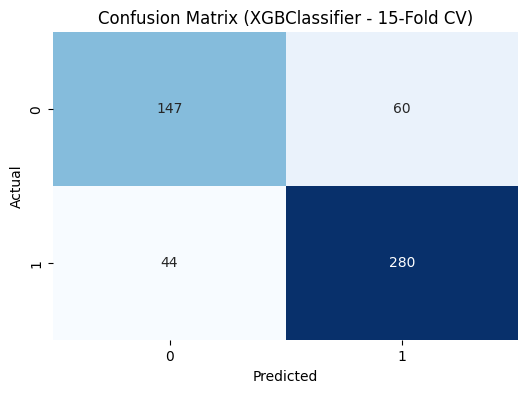

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model, n_splits=15)

# XGBoost Performance Visualisation

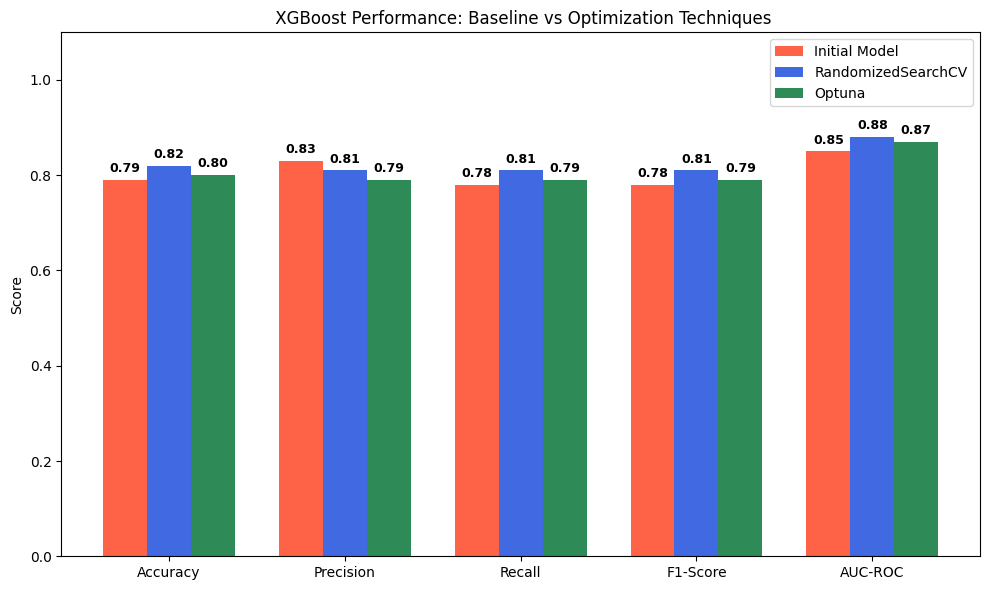

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

base_model = [0.79, 0.83, 0.78, 0.78, 0.85]          # XGB (Base)
model_random = [0.82, 0.81, 0.81, 0.81, 0.88]        # XGB (Stratified) Random Search
model_optuna = [0.80, 0.79, 0.79, 0.79, 0.87]        # XGB (Stratified) Optuna

x = np.arange(len(metrics))
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - width, base_model, width, label="Initial Model", color="tomato")
bars2 = plt.bar(x, model_random, width, label="RandomizedSearchCV", color="royalblue")
bars3 = plt.bar(x + width, model_optuna, width, label="Optuna", color="seagreen")

# Annotate values on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,   # a little above bar
            f"{height:.2f}",
            ha='center', va='bottom', fontsize=9, fontweight="bold"
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and style
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title(" XGBoost Performance: Baseline vs Optimization Techniques")
plt.legend()
plt.tight_layout()
plt.show()


# Model Building: Adaboost

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Stronger base learner
base_best = DecisionTreeClassifier(
    max_depth=3,          # deeper tree → captures more patterns
    min_samples_split=2,  # default (less restrictive than 50)
    random_state=42
)

# Optimized AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=base_best,
    n_estimators=200,     # more weak learners → better ensemble
    learning_rate=0.8,    # faster learning but still stable
    random_state=42
)

In [20]:
import joblib

# Save model
joblib.dump(adaboost_model, "heart_disease_adaboost.pkl")


['heart_disease_adaboost.pkl']

In [17]:
# Train model
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred = adaboost_model.predict(X_test)

In [18]:
# Metrics (Before Tuning)
ada_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ada_accuracy}")

y_pred_proba = adaboost_model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7476635514018691
ROC-AUC Score: 0.8305


In [19]:
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.8286    0.5800    0.6824        50
           1     0.7083    0.8947    0.7907        57

    accuracy                         0.7477       107
   macro avg     0.7685    0.7374    0.7365       107
weighted avg     0.7645    0.7477    0.7401       107



/tmp/ipython-input-2930246873.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


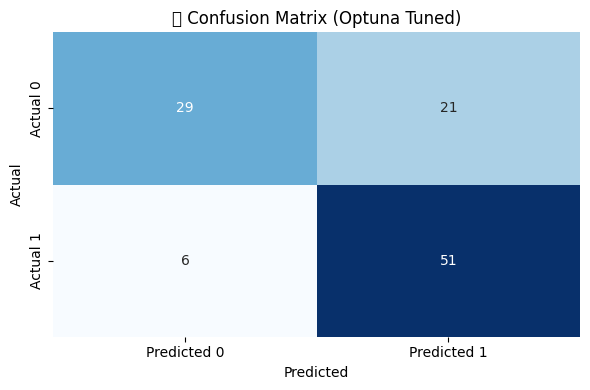

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('🔍 Confusion Matrix (Optuna Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Random Search: Adaboost tuning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import classification_report

# Define base estimator (weak learner)
base_estimator = DecisionTreeClassifier(random_state=42)

# Define AdaBoost model
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    random_state=42
)

# Hyperparameter space for AdaBoost
param_dist = {
    'n_estimators': randint(50, 400),          # number of weak learners
    'learning_rate': uniform(0.001, 2.0),      # step size
    'estimator__max_depth': randint(1, 5),     # depth of weak learners
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 10)
}

# RandomizedSearchCV with ROC AUC scoring
random_search_f1 = RandomizedSearchCV(
    estimator=adaboost,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)


In [ ]:
# Fit the search
random_search_f1.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search_f1.best_params_)

Best parameters: {'estimator__max_depth': 1, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 14, 'learning_rate': np.float64(0.15495981965758598), 'n_estimators': 236}


In [ ]:
# Evaluate on test set
best_model_f1 = random_search_f1.best_estimator_

In [ ]:
print("Best CV ROC AUC score:", random_search_f1.best_score_)

Best CV ROC AUC score: 0.8711609719122653



Starting 15-Fold Stratified Cross-Validation using AdaBoostClassifier...

Fold 1 Accuracy: 0.8611
Fold 2 Accuracy: 0.8611
Fold 3 Accuracy: 0.7778
Fold 4 Accuracy: 0.7222
Fold 5 Accuracy: 0.6944
Fold 6 Accuracy: 0.8611
Fold 7 Accuracy: 0.8000
Fold 8 Accuracy: 0.8000
Fold 9 Accuracy: 0.8286
Fold 10 Accuracy: 0.8000
Fold 11 Accuracy: 0.8000
Fold 12 Accuracy: 0.9143
Fold 13 Accuracy: 0.8286
Fold 14 Accuracy: 0.8571
Fold 15 Accuracy: 0.7714

----------------------------------------
Average Accuracy: 0.8119
Standard Deviation: 0.0551

Classification Report:
              precision    recall  f1-score   support

           0     0.7831    0.7150    0.7475       207
           1     0.8275    0.8735    0.8498       324

    accuracy                         0.8117       531
   macro avg     0.8053    0.7942    0.7987       531
weighted avg     0.8102    0.8117    0.8099       531



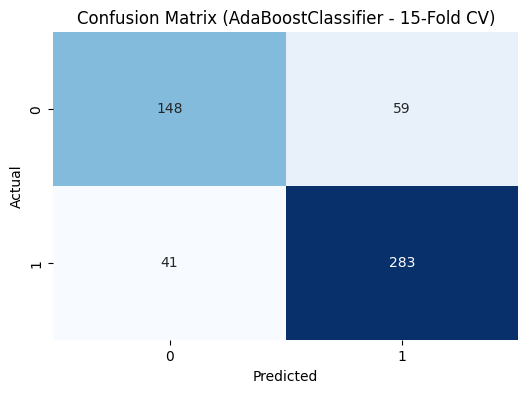

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model_f1, n_splits=15)

# Optuna Tuning: Adaboost

In [ ]:
%pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 400)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 2.0, log=True)
    max_depth = trial.suggest_int("max_depth", 1, 5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Weak learner
    base_estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # AdaBoost model
    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    # 5-fold CV with ROC AUC
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)



[I 2025-11-11 22:33:59,525] A new study created in memory with name: no-name-1b1a958e-138c-4e05-9e05-8f537c0d182e
[I 2025-11-11 22:34:01,636] Trial 0 finished with value: 0.8669818365230719 and parameters: {'n_estimators': 76, 'learning_rate': 0.37596340084979085, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8669818365230719.
[I 2025-11-11 22:34:04,857] Trial 1 finished with value: 0.8573228032506031 and parameters: {'n_estimators': 79, 'learning_rate': 0.030686529935451828, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8669818365230719.
[I 2025-11-11 22:34:11,964] Trial 2 finished with value: 0.8700215279186672 and parameters: {'n_estimators': 314, 'learning_rate': 0.12359825520351819, 'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8700215279186672.
[I 2025-11-11 22:34:21,138] Trial 3 finished with value: 0.8399545067739682 and parameters: {

In [ ]:
# Best parameters
print("Best parameters:", study.best_params)

# Train best model on full training data
best_params = study.best_params
best_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=best_params["max_depth"],
        min_samples_split=best_params["min_samples_split"],
        min_samples_leaf=best_params["min_samples_leaf"],
        random_state=42
    ),
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    random_state=42
)

Best parameters: {'n_estimators': 110, 'learning_rate': 0.38957655648590894, 'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 1}


In [ ]:
print("Best CV ROC AUC:", study.best_value)

Best CV ROC AUC: 0.8744526442145129



Starting 15-Fold Stratified Cross-Validation using AdaBoostClassifier...

Fold 1 Accuracy: 0.8611
Fold 2 Accuracy: 0.8333
Fold 3 Accuracy: 0.7778
Fold 4 Accuracy: 0.7222
Fold 5 Accuracy: 0.7222
Fold 6 Accuracy: 0.8333
Fold 7 Accuracy: 0.7714
Fold 8 Accuracy: 0.8286
Fold 9 Accuracy: 0.8286
Fold 10 Accuracy: 0.8286
Fold 11 Accuracy: 0.8000
Fold 12 Accuracy: 0.9429
Fold 13 Accuracy: 0.8000
Fold 14 Accuracy: 0.8571
Fold 15 Accuracy: 0.7714

----------------------------------------
Average Accuracy: 0.8119
Standard Deviation: 0.0543

Classification Report:
              precision    recall  f1-score   support

           0     0.7772    0.7246    0.7500       207
           1     0.8314    0.8673    0.8489       324

    accuracy                         0.8117       531
   macro avg     0.8043    0.7960    0.7995       531
weighted avg     0.8102    0.8117    0.8104       531



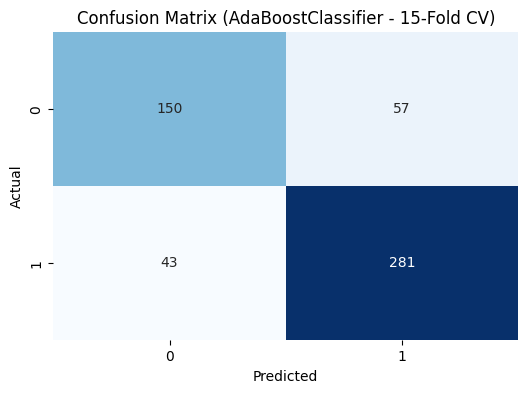

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model, n_splits=15)

# Adaboost Performance Visualisation

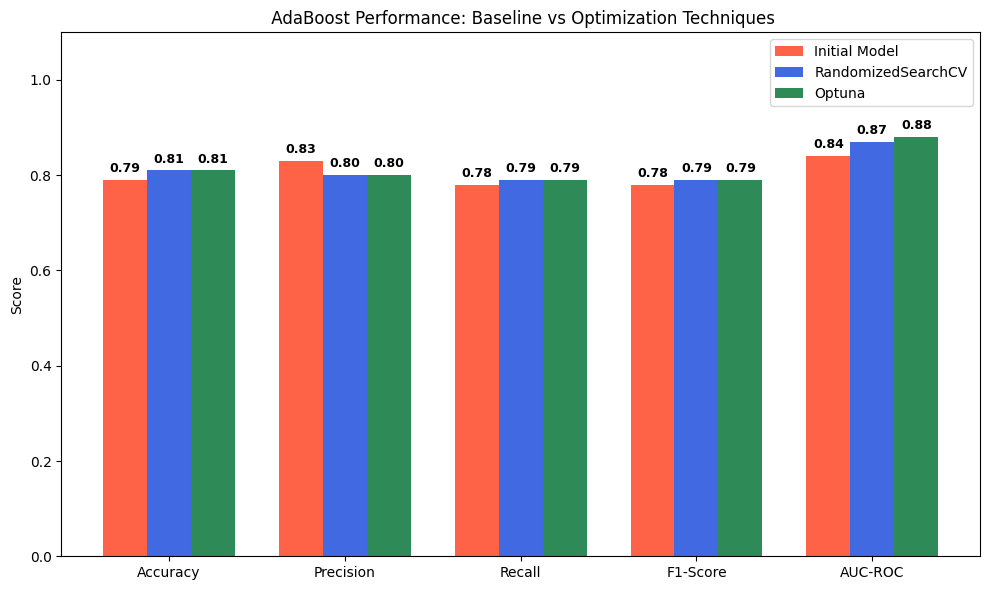

In [ ]:
# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

# AdaBoost model results
base_model = [0.79, 0.83, 0.78, 0.78, 0.84]          # AdaBoost (Base)
model_random = [0.81, 0.80, 0.79, 0.79, 0.87]        # AdaBoost (Stratified) Random Search
model_optuna = [0.81, 0.80, 0.79, 0.79, 0.88]        # AdaBoost (Stratified) Optuna


x = np.arange(len(metrics))
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - width, base_model, width, label="Initial Model", color="tomato")
bars2 = plt.bar(x, model_random, width, label="RandomizedSearchCV", color="royalblue")
bars3 = plt.bar(x + width, model_optuna, width, label="Optuna", color="seagreen")

# Annotate values on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,   # a little above bar
            f"{height:.2f}",
            ha='center', va='bottom', fontsize=9, fontweight="bold"
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and style
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title(" AdaBoost Performance: Baseline vs Optimization Techniques")
plt.legend()
plt.tight_layout()
plt.show()

# Model Building: Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define base Logistic Regression model
log_reg = LogisticRegression(
    solver="lbfgs",     # default solver, good for l2 penalty
    max_iter=1000,      # increase iterations for convergence
    random_state=42
)

In [ ]:

# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict
y_pred = log_reg.predict(X_test)

In [ ]:
# Metrics (Before Tuning)
XGB_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {XGB_accuracy}")

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7850467289719626
ROC-AUC Score: 0.8898


In [ ]:
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.8293    0.6800    0.7473        50
           1     0.7576    0.8772    0.8130        57

    accuracy                         0.7850       107
   macro avg     0.7934    0.7786    0.7801       107
weighted avg     0.7911    0.7850    0.7823       107



/tmp/ipython-input-2930246873.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


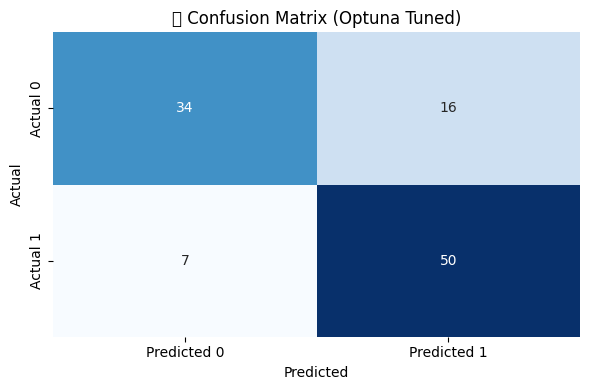

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('🔍 Confusion Matrix (Optuna Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model, n_splits=15)

# random search: LR tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import classification_report

# Define Logistic Regression model
lr = LogisticRegression(
    solver="saga",      # supports l1, l2, elasticnet
    max_iter=5000,
    random_state=42
)

# Hyperparameter space for Logistic Regression
param_dist = {
    'C': uniform(0.001, 10),                 # regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],   # type of regularization
    'l1_ratio': uniform(0, 1)                # only used if elasticnet
}

# RandomizedSearchCV with ROC AUC scoring
random_search_f1 = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)


In [ ]:
# Fit the search
random_search_f1.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search_f1.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best parameters: {'C': np.float64(7.797910002727693), 'l1_ratio': np.float64(0.596850157946487), 'penalty': 'l2'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Evaluate on test set
best_model_f1 = random_search_f1.best_estimator_

In [ ]:
print("Best CV ROC AUC score:", random_search_f1.best_score_)

Best CV ROC AUC score: 0.8468032167895224


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Starting 15-Fold Stratified Cross-Validation using LogisticRegression...



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 1 Accuracy: 0.7778


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 2 Accuracy: 0.8333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 3 Accuracy: 0.7778


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 4 Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 5 Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 6 Accuracy: 0.8611


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 7 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 8 Accuracy: 0.7429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 9 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 10 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 11 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 12 Accuracy: 0.8857


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 13 Accuracy: 0.7429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 14 Accuracy: 0.8286
Fold 15 Accuracy: 0.8000

----------------------------------------
Average Accuracy: 0.8043
Standard Deviation: 0.0436

Classification Report:
              precision    recall  f1-score   support

           0     0.7814    0.6908    0.7333       207
           1     0.8161    0.8765    0.8452       324

    accuracy                         0.8041       531
   macro avg     0.7988    0.7837    0.7893       531
weighted avg     0.8026    0.8041    0.8016       531



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


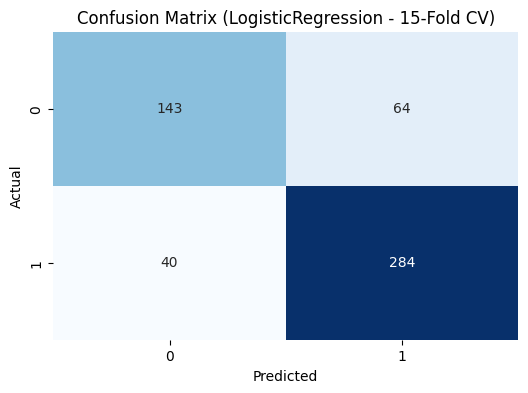

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model_f1, n_splits=15)

# Optuna: LR tuning

In [ ]:
%pip install optuna

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_float("C", 0.001, 10.0, log=True)  # inverse reg strength
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    l1_ratio = None
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)

    # Logistic Regression model
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        l1_ratio=l1_ratio,
        solver="saga",     # required for l1 & elasticnet
        max_iter=5000,
        random_state=42
    )

    # 5-fold CV with ROC AUC
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-11-11 22:42:24,616] A new study created in memory with name: no-name-292aad6a-9a6e-4fc8-8971-a56945d018fc
[I 2025-11-11 22:42:24,893] Trial 0 finished with value: 0.7599260893577692 and parameters: {'C': 0.009163883729609341, 'penalty': 'l1'}. Best is trial 0 with value: 0.7599260893577692.
[I 2025-11-11 22:42:31,546] Trial 1 finished with value: 0.846444089402854 and parameters: {'C': 1.053298663177178, 'penalty': 'l2'}. Best is trial 1 with value: 0.846444089402854.
[I 2025-11-11 22:42:39,326] Trial 2 finished with value: 0.8465635637158766 and parameters: {'C': 1.564841143099068, 'penalty': 'l2'}. Best is trial 2 with value: 0.8465635637158766.
[I 2025-11-11 22:42:39,982] Trial 3 finished with value: 0.7601308018304367 and parameters: {'C': 0.003780340694372491, 'penalty': 'elasticnet', 'l1_ratio': 0.24452056913109854}. Best is trial 2 with value: 0.8465635637158766.
[I 2025-11-11 22:42:50,969] Trial 4 finished with value: 0.8450134972160231 and parameters: {'C': 0.272943681

In [ ]:
# Best parameters
print("Best parameters:", study.best_params)

Best parameters: {'C': 6.861738144068784, 'penalty': 'l2'}


In [ ]:
# Train best model on full training data
best_params = study.best_params
best_model = LogisticRegression(
    C=best_params["C"],
    penalty=best_params["penalty"],
    l1_ratio=best_params.get("l1_ratio", None),
    solver="saga",
    max_iter=5000,
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print("Best CV ROC AUC:", study.best_value)

Best CV ROC AUC: 0.8468032167895224


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Starting 15-Fold Stratified Cross-Validation using LogisticRegression...



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 1 Accuracy: 0.7778


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 2 Accuracy: 0.8333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 3 Accuracy: 0.7778


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 4 Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 5 Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 6 Accuracy: 0.8611


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 7 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 8 Accuracy: 0.7429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 9 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 10 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 11 Accuracy: 0.8286


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 12 Accuracy: 0.8857


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 13 Accuracy: 0.7429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Fold 14 Accuracy: 0.8286
Fold 15 Accuracy: 0.8000

----------------------------------------
Average Accuracy: 0.8043
Standard Deviation: 0.0436

Classification Report:
              precision    recall  f1-score   support

           0     0.7814    0.6908    0.7333       207
           1     0.8161    0.8765    0.8452       324

    accuracy                         0.8041       531
   macro avg     0.7988    0.7837    0.7893       531
weighted avg     0.8026    0.8041    0.8016       531



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


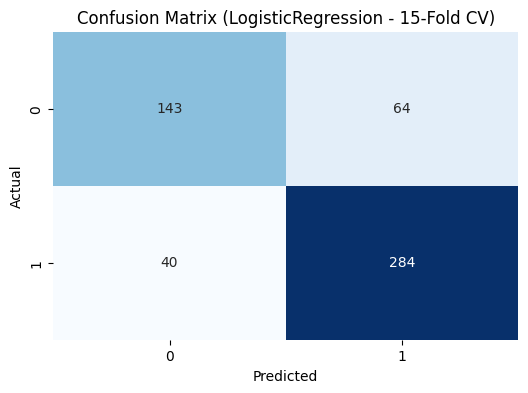

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model_f1, n_splits=15)

# Logistic Regression Performance Visualisation

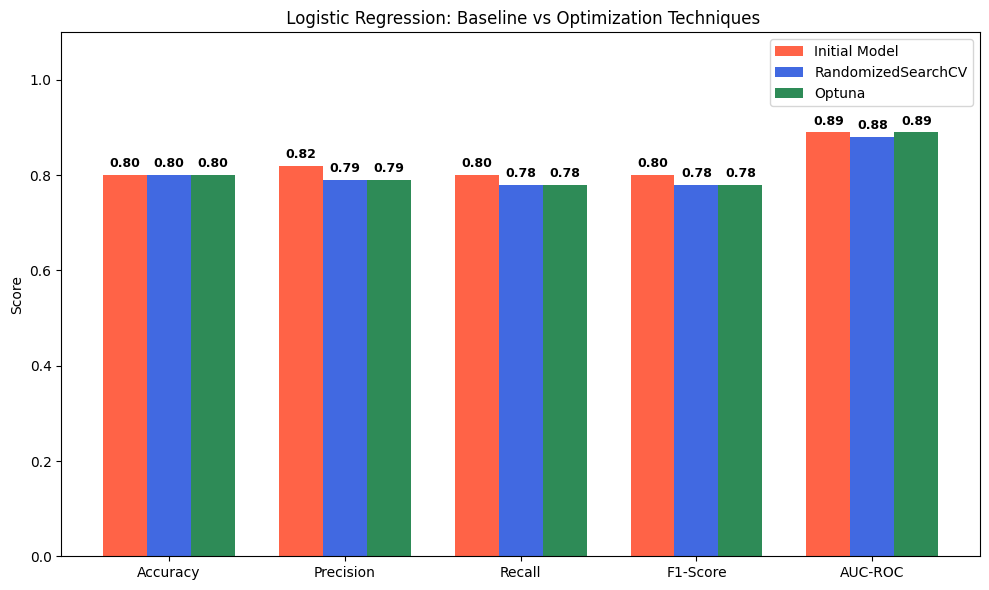

In [ ]:
# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

# Logistic Regression model results
base_model = [0.80, 0.82, 0.80, 0.80, 0.89]          # Logistic Regression (Base)
model_random = [0.80, 0.79, 0.78, 0.78, 0.88]        # Logistic Regression (Stratified) Random Search
model_optuna = [0.80, 0.79, 0.78, 0.78, 0.89]        # Logistic Regression (Stratified) Optuna


x = np.arange(len(metrics))
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - width, base_model, width, label="Initial Model", color="tomato")
bars2 = plt.bar(x, model_random, width, label="RandomizedSearchCV", color="royalblue")
bars3 = plt.bar(x + width, model_optuna, width, label="Optuna", color="seagreen")

# Annotate values on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,   # a little above bar
            f"{height:.2f}",
            ha='center', va='bottom', fontsize=9, fontweight="bold"
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and style
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title(" Logistic Regression: Baseline vs Optimization Techniques")
plt.legend()
plt.tight_layout()
plt.show()

For the Logistic regression Both techniques decreases all the metrics only the AUC-Roc remains the same

# KNN: Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Build KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune k
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

In [ ]:
# Metrics (Before Tuning)
XGB_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {XGB_accuracy}")

y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.6915887850467289
ROC-AUC Score: 0.7200


In [ ]:
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.7742    0.4800    0.5926        50
           1     0.6579    0.8772    0.7519        57

    accuracy                         0.6916       107
   macro avg     0.7160    0.6786    0.6722       107
weighted avg     0.7122    0.6916    0.6774       107



/tmp/ipython-input-2930246873.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


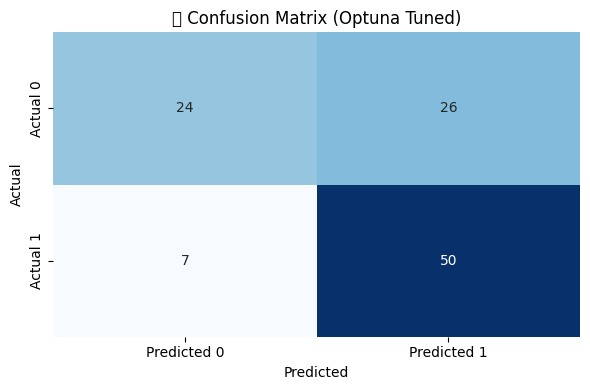

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('🔍 Confusion Matrix (Optuna Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Random Search: KNN

In [ ]:
# Define KNN model
knn = KNeighborsClassifier()

# Hyperparameter space for KNN
param_dist_knn = {
    'n_neighbors': randint(1, 50),     # number of neighbors to try
    'weights': ['uniform', 'distance'],
    'p': [1, 2]                        # distance metric (Manhattan / Euclidean)
}

# RandomizedSearchCV with ROC AUC scoring
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist_knn,
    n_iter=30,            # number of parameter settings to sample
    cv=5,                 # 5-fold cross-validation
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Fit the model
random_search_knn.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search_knn.best_params_)

Best Parameters: {'n_neighbors': 44, 'p': 1, 'weights': 'distance'}


In [ ]:
# Evaluate on test set
best_model_f1 = random_search_knn.best_estimator_
y_pred_tuned_f1 = best_model_f1.predict(X_test)

In [ ]:
print("Best ROC-AUC:", random_search_knn.best_score_)

Best ROC-AUC: 0.806648012894209



Starting 15-Fold Stratified Cross-Validation using RandomizedSearchCV...

Fold 1 Accuracy: 0.7500
Fold 2 Accuracy: 0.7778
Fold 3 Accuracy: 0.6111
Fold 4 Accuracy: 0.5556
Fold 5 Accuracy: 0.6944
Fold 6 Accuracy: 0.8333
Fold 7 Accuracy: 0.8000
Fold 8 Accuracy: 0.6571
Fold 9 Accuracy: 0.8000
Fold 10 Accuracy: 0.8286
Fold 11 Accuracy: 0.7714
Fold 12 Accuracy: 0.8286
Fold 13 Accuracy: 0.7714
Fold 14 Accuracy: 0.8000
Fold 15 Accuracy: 0.7429

----------------------------------------
Average Accuracy: 0.7481
Standard Deviation: 0.0805

Classification Report:
              precision    recall  f1-score   support

           0     0.7160    0.5845    0.6436       207
           1     0.7624    0.8519    0.8047       324

    accuracy                         0.7476       531
   macro avg     0.7392    0.7182    0.7241       531
weighted avg     0.7443    0.7476    0.7419       531



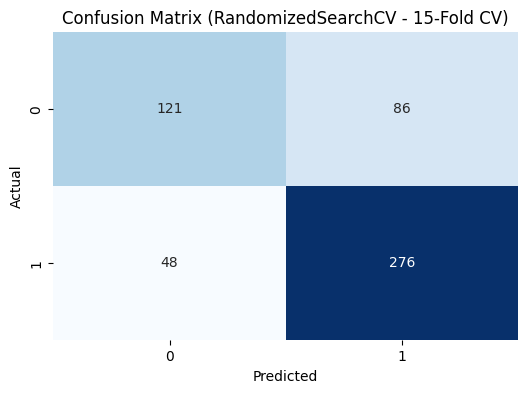

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, random_search_knn, n_splits=15)

# Optuna: KNN

In [ ]:
# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_neighbors = trial.suggest_int("n_neighbors", 1, 50)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    p = trial.suggest_categorical("p", [1, 2])  # Manhattan vs Euclidean

    # Define KNN model
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )

    # 5-fold CV with ROC AUC
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

# Run Optuna study
study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective, n_trials=50)

print("Best parameters:", study_knn.best_params)

[I 2025-11-11 22:46:48,970] A new study created in memory with name: no-name-770c0469-f549-4ac9-81c0-0f37f4911a2b
[I 2025-11-11 22:46:49,032] Trial 0 finished with value: 0.7851585570658912 and parameters: {'n_neighbors': 42, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7851585570658912.
[I 2025-11-11 22:46:49,082] Trial 1 finished with value: 0.6980691795721468 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7851585570658912.
[I 2025-11-11 22:46:49,141] Trial 2 finished with value: 0.7663653039832286 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7851585570658912.
[I 2025-11-11 22:46:49,201] Trial 3 finished with value: 0.7825447042447194 and parameters: {'n_neighbors': 33, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7851585570658912.
[I 2025-11-11 22:46:49,252] Trial 4 finished with value: 0.7655284906787494 and parameters: {'n_neighbors': 14, 'weights'

Best parameters: {'n_neighbors': 40, 'weights': 'distance', 'p': 1}


In [ ]:
# Train best model on full training data
best_params = study_knn.best_params
best_model = KNeighborsClassifier(
    n_neighbors=best_params["n_neighbors"],
    weights=best_params["weights"],
    p=best_params["p"]
)

# Fit the model
best_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40, p=1, weights='distance')

In [ ]:
print("Best ROC-AUC:", study_knn.best_value)

Best ROC-AUC: 0.8071022407069272



Starting 15-Fold Stratified Cross-Validation using KNeighborsClassifier...

Fold 1 Accuracy: 0.7500
Fold 2 Accuracy: 0.7778
Fold 3 Accuracy: 0.5833
Fold 4 Accuracy: 0.5556
Fold 5 Accuracy: 0.6389
Fold 6 Accuracy: 0.8333
Fold 7 Accuracy: 0.8000
Fold 8 Accuracy: 0.6000
Fold 9 Accuracy: 0.8286
Fold 10 Accuracy: 0.8286
Fold 11 Accuracy: 0.7429
Fold 12 Accuracy: 0.8000
Fold 13 Accuracy: 0.7714
Fold 14 Accuracy: 0.7714
Fold 15 Accuracy: 0.7429

----------------------------------------
Average Accuracy: 0.7350
Standard Deviation: 0.0906

Classification Report:
              precision    recall  f1-score   support

           0     0.6919    0.5749    0.6280       207
           1     0.7549    0.8364    0.7936       324

    accuracy                         0.7345       531
   macro avg     0.7234    0.7056    0.7108       531
weighted avg     0.7303    0.7345    0.7290       531



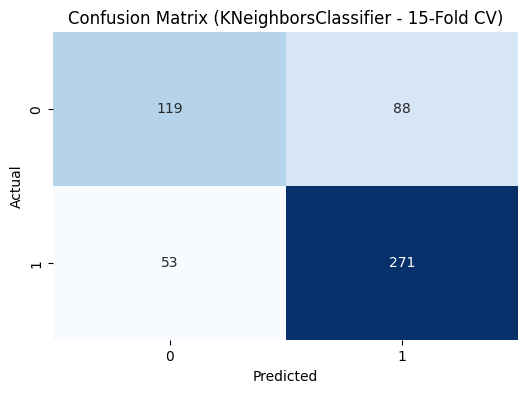

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model, n_splits=15)

# KNN Performance Visualisation

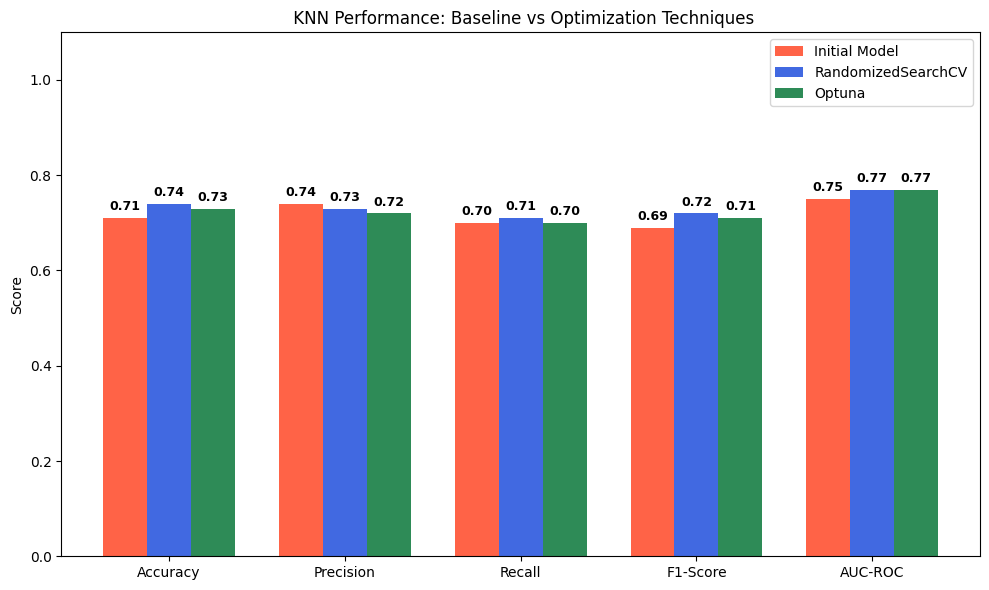

In [ ]:
# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

# KNN model results
base_model = [0.71, 0.74, 0.70, 0.69, 0.75]          # KNN (Base)
model_random = [0.74, 0.73, 0.71, 0.72, 0.77]        # KNN (Stratified) Random Search
model_optuna = [0.73, 0.72, 0.70, 0.71, 0.77]        # KNN (Stratified) Optuna


x = np.arange(len(metrics))
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - width, base_model, width, label="Initial Model", color="tomato")
bars2 = plt.bar(x, model_random, width, label="RandomizedSearchCV", color="royalblue")
bars3 = plt.bar(x + width, model_optuna, width, label="Optuna", color="seagreen")

# Annotate values on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,   # a little above bar
            f"{height:.2f}",
            ha='center', va='bottom', fontsize=9, fontweight="bold"
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and style
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title(" KNN Performance: Baseline vs Optimization Techniques")
plt.legend()
plt.tight_layout()
plt.show()

# Catboost: Model Building

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Initialize CatBoost model
cat_model = CatBoostClassifier(
    iterations=1000,        # number of trees
    learning_rate=0.1,
    depth=2,
    eval_metric='Accuracy',
    verbose=100,           # print progress every 100 iterations
    random_seed=42
)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions
y_pred = cat_model.predict(X_test)


0:	learn: 0.7547170	total: 54.7ms	remaining: 54.6s
100:	learn: 0.8490566	total: 328ms	remaining: 2.92s
200:	learn: 0.8773585	total: 448ms	remaining: 1.78s
300:	learn: 0.9056604	total: 608ms	remaining: 1.41s
400:	learn: 0.9221698	total: 663ms	remaining: 990ms
500:	learn: 0.9363208	total: 958ms	remaining: 954ms
600:	learn: 0.9410377	total: 1.19s	remaining: 787ms
700:	learn: 0.9528302	total: 1.4s	remaining: 598ms
800:	learn: 0.9599057	total: 1.7s	remaining: 423ms
900:	learn: 0.9716981	total: 1.96s	remaining: 215ms
999:	learn: 0.9740566	total: 2.19s	remaining: 0us


In [ ]:
# Metrics (Before Tuning)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

y_pred_proba = cat_model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7850467289719626
ROC-AUC Score: 0.8505


In [ ]:
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.8649    0.6400    0.7356        50
           1     0.7429    0.9123    0.8189        57

    accuracy                         0.7850       107
   macro avg     0.8039    0.7761    0.7773       107
weighted avg     0.7999    0.7850    0.7800       107



/tmp/ipython-input-862175239.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


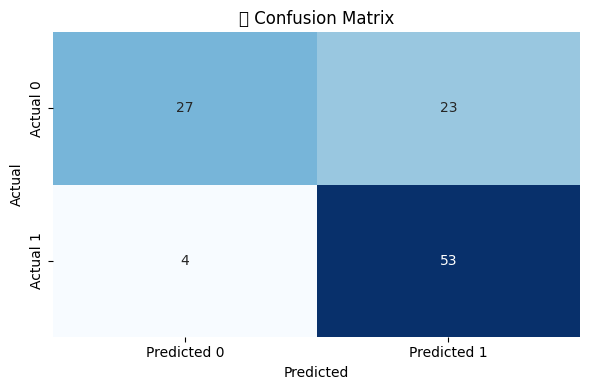

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,  y_pred)

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('🔍 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Catboost: random search

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Initialize CatBoost with slightly suboptimal parameters
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=2,
    eval_metric='Accuracy',
    verbose=0,          # suppress training logs for RandomizedSearchCV
    random_seed=42
)

# Define hyperparameter search space
param_dist = {
    'iterations': [100, 200, 300, 400, 500],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'depth': [2, 3, 4, 5, 6, 7, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
    'border_count': [32, 50, 100, 200]
}

# 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=50,               # number of random combinations to try
    scoring='accuracy',
    cv=kfold,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7b27ae3c2330>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'border_count': [32, 50, 100, 200],
                                        'depth': [2, 3, 4, 5, 6, 7, 8],
                                        'iterations': [100, 200, 300, 400, 500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 10],
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ])},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Best parameters and model
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'learning_rate': np.float64(0.07444444444444444), 'l2_leaf_reg': 5, 'iterations': 100, 'depth': 3, 'border_count': 100}


In [ ]:
best_cat = random_search.best_estimator_
y_pred = best_cat.predict(X_test)


Starting 15-Fold Stratified Cross-Validation using CatBoostClassifier...

Fold 1 Accuracy: 0.8333
Fold 2 Accuracy: 0.8333
Fold 3 Accuracy: 0.7500
Fold 4 Accuracy: 0.7500
Fold 5 Accuracy: 0.7500
Fold 6 Accuracy: 0.8889
Fold 7 Accuracy: 0.8000
Fold 8 Accuracy: 0.8000
Fold 9 Accuracy: 0.8286
Fold 10 Accuracy: 0.8000
Fold 11 Accuracy: 0.7714
Fold 12 Accuracy: 0.9143
Fold 13 Accuracy: 0.8000
Fold 14 Accuracy: 0.8286
Fold 15 Accuracy: 0.8000

----------------------------------------
Average Accuracy: 0.8099
Standard Deviation: 0.0459

Classification Report:
              precision    recall  f1-score   support

           0     0.7880    0.7005    0.7417       207
           1     0.8213    0.8796    0.8495       324

    accuracy                         0.8098       531
   macro avg     0.8047    0.7901    0.7956       531
weighted avg     0.8084    0.8098    0.8075       531



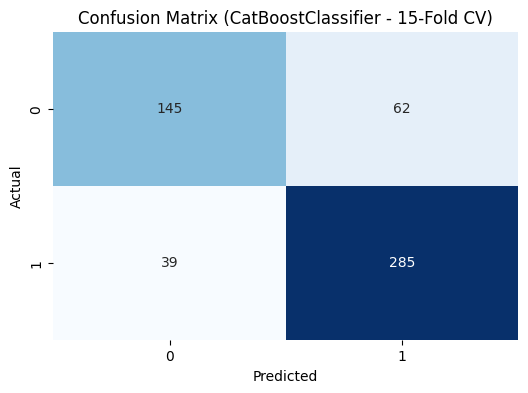

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_cat, n_splits=15)

# Catboost: Optuna

In [ ]:
!pip install optuna

In [ ]:

import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    depth = trial.suggest_int("depth", 2, 10)  # tree depth
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 0.3, log=True)
    iterations = trial.suggest_int("iterations", 50, 1000)  # boosting rounds
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1, 10)  # L2 regularization
    border_count = trial.suggest_int("border_count", 32, 255)  # number of splits per feature

    # Define CatBoost model
    model = CatBoostClassifier(
        depth=depth,
        learning_rate=learning_rate,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        border_count=border_count,
        eval_metric="AUC",
        verbose=0,
        random_seed=42
    )

    # 5-fold CV with ROC AUC
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

# Run Optuna study
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective, n_trials=50)

print("Best parameters:", study_cat.best_params)

[I 2025-11-11 22:54:26,564] A new study created in memory with name: no-name-a23be6c4-bc5c-4d4d-b628-85d4454ceefa
[I 2025-11-11 22:54:34,280] Trial 0 finished with value: 0.8422037375171886 and parameters: {'depth': 7, 'learning_rate': 0.1972112046466661, 'iterations': 282, 'l2_leaf_reg': 1.4814313866858706, 'border_count': 46}. Best is trial 0 with value: 0.8422037375171886.
[I 2025-11-11 22:54:39,836] Trial 1 finished with value: 0.8534872974008701 and parameters: {'depth': 4, 'learning_rate': 0.028992485266215114, 'iterations': 443, 'l2_leaf_reg': 4.364656671257378, 'border_count': 147}. Best is trial 1 with value: 0.8534872974008701.
[I 2025-11-11 22:54:44,794] Trial 2 finished with value: 0.8653269482202836 and parameters: {'depth': 3, 'learning_rate': 0.01323180994429126, 'iterations': 617, 'l2_leaf_reg': 3.9069082982324512, 'border_count': 217}. Best is trial 2 with value: 0.8653269482202836.
[I 2025-11-11 22:54:46,552] Trial 3 finished with value: 0.8666339802980095 and paramet

Best parameters: {'depth': 2, 'learning_rate': 0.00598824409006426, 'iterations': 987, 'l2_leaf_reg': 3.9522154724851717, 'border_count': 239}


In [ ]:
# Train final model with best parameters for Optuna CatBoost
best_params_optuna_cat = study_cat.best_params
best_model = CatBoostClassifier(
    depth=best_params_optuna_cat["depth"],
    learning_rate=best_params_optuna_cat["learning_rate"],
    iterations=best_params_optuna_cat["iterations"],
    l2_leaf_reg=best_params_optuna_cat["l2_leaf_reg"],
    border_count=best_params_optuna_cat["border_count"],
    eval_metric="AUC",
    verbose=0, # Suppress verbose output for cleaner execution
    random_seed=42
)

best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)


Starting 15-Fold Stratified Cross-Validation using CatBoostClassifier...

Fold 1 Accuracy: 0.8333
Fold 2 Accuracy: 0.8056
Fold 3 Accuracy: 0.8056
Fold 4 Accuracy: 0.7500
Fold 5 Accuracy: 0.7778
Fold 6 Accuracy: 0.8889
Fold 7 Accuracy: 0.8000
Fold 8 Accuracy: 0.8000
Fold 9 Accuracy: 0.8286
Fold 10 Accuracy: 0.8000
Fold 11 Accuracy: 0.7429
Fold 12 Accuracy: 0.9143
Fold 13 Accuracy: 0.8000
Fold 14 Accuracy: 0.8286
Fold 15 Accuracy: 0.7714

----------------------------------------
Average Accuracy: 0.8098
Standard Deviation: 0.0443

Classification Report:
              precision    recall  f1-score   support

           0     0.7849    0.7053    0.7430       207
           1     0.8232    0.8765    0.8490       324

    accuracy                         0.8098       531
   macro avg     0.8041    0.7909    0.7960       531
weighted avg     0.8083    0.8098    0.8077       531



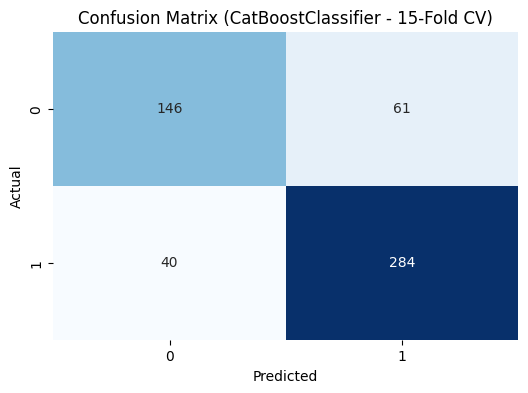

In [ ]:
avg_acc, report, cm = cross_validate_model(X, y, best_model, n_splits=15)

# Catboost Performance Visualisation

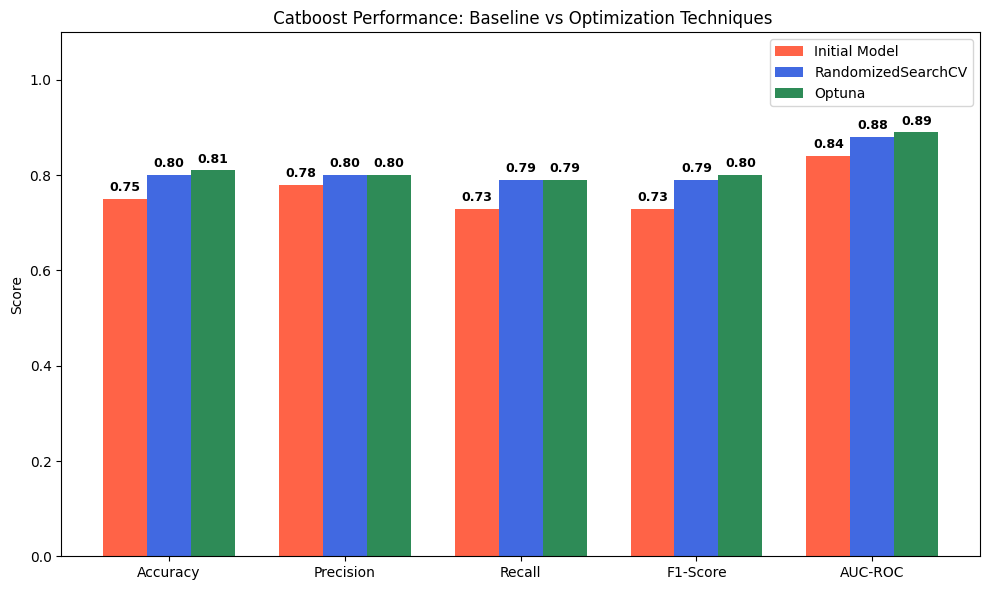

In [ ]:
# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

# CatBoost model results
base_model = [0.75, 0.78, 0.73, 0.73, 0.84]          # CatBoost (Base)
model_random = [0.80, 0.80, 0.79, 0.79, 0.88]        # CatBoost (Stratified) Random Search
model_optuna = [0.81, 0.80, 0.79, 0.80, 0.89]        # CatBoost (Stratified) Optuna

x = np.arange(len(metrics))
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - width, base_model, width, label="Initial Model", color="tomato")
bars2 = plt.bar(x, model_random, width, label="RandomizedSearchCV", color="royalblue")
bars3 = plt.bar(x + width, model_optuna, width, label="Optuna", color="seagreen")

# Annotate values on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,   # a little above bar
            f"{height:.2f}",
            ha='center', va='bottom', fontsize=9, fontweight="bold"
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and style
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title(" Catboost Performance: Baseline vs Optimization Techniques")
plt.legend()
plt.tight_layout()
plt.show()